In [31]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# preprocessing

In [32]:
# load dataset
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# split dataset
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape)
print(train_target.shape)

(48000, 28, 28, 1)
(48000,)


# 합성곱 신경망 만들기

In [33]:
# 합성곱 적용
# 32개의 필터, (3, 3) 커널, 활성화 함수: relu, 세임패딩

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28, 28, 1)))

In [34]:
# (2, 2) 풀링 적용하게 되면
# (28, 28, 32) -> (14, 14, 32)로 될 것.

model.add(keras.layers.MaxPooling2D(2))

In [35]:
# 합성곱 적용
# 64개 필터, (3, 3) 커널, 활성화 함수: relu, 세임패딩

# (2, 2) 풀링 적용하게 되면
# (14, 14, 64) -> (7, 7, 64)로 될 것.

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [36]:
# flatten -> dense -> dense 출력층

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [38]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5123 - accuracy: 0.8168 - val_loss: 0.3284 - val_accuracy: 0.8803
Epoch 2/20
   5/1500 [..............................] - ETA: 24s - loss: 0.4637 - accuracy: 0.8313

/Users/gimseonjun/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 24s 16ms/step - loss: 0.3426 - accuracy: 0.8771 - val_loss: 0.2902 - val_accuracy: 0.8904
Epoch 3/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2907 - accuracy: 0.8957 - val_loss: 0.2654 - val_accuracy: 0.9016
Epoch 4/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2599 - accuracy: 0.9052 - val_loss: 0.2366 - val_accuracy: 0.9121
Epoch 5/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2347 - accuracy: 0.9141 - val_loss: 0.2407 - val_accuracy: 0.9130
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2154 - accuracy: 0.9204 - val_loss: 0.2287 - val_accuracy: 0.9171
Epoch 7/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1967 - accuracy: 0.9264 - val_loss: 0.2199 - val_accuracy: 0.9197
Epoch 8/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1840 - accuracy: 0.9324 - val_loss: 0.2246 - val_accura

In [40]:
len(train_scaled), len(train_target)

(48000, 48000)

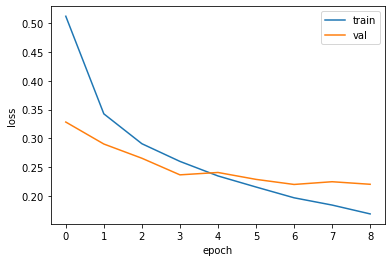

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [42]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2199 - accuracy: 0.9197


[0.21986189484596252, 0.9197499752044678]

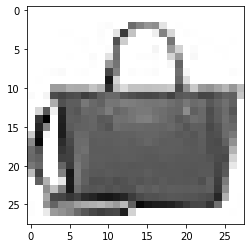

In [43]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [44]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 103ms/step
[[4.3686118e-15 6.9376753e-21 2.9318577e-18 1.2420817e-16 7.1023506e-16
  5.6478565e-14 2.4229248e-15 2.4185189e-16 1.0000000e+00 1.0137619e-15]]


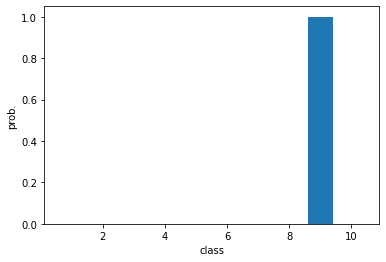

In [45]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [46]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [47]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [48]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2428 - accuracy: 0.9120


[0.24278080463409424, 0.9120000004768372]